<a href="https://colab.research.google.com/github/mkjubran/MachineLearningNotebooks/blob/master/Pytorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case #1: MNIST DATASET

**Loading Packages - Libraries**

In [154]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import pdb

**Loading Dataset**

In [155]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

**Creating Dataloader**

In [156]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


**Creating Models**

In [157]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**Optimizing the Model Parameters**

Defining the loss function and an optimizer.

In [158]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Training Loop

In [159]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    correct /= size
    return (100*correct), loss

Testing Loop

In [160]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (100*correct), test_loss

Running Training and Testing

In [161]:
epochs = 10
Training_accuracy=[]
Training_loss=[]
Testing_accuracy=[]
Testing_loss=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    TrainAcc, TrainLoss = train(train_dataloader, model, loss_fn, optimizer)
    TestAcc, TestLoss = test(test_dataloader, model, loss_fn)
    Training_accuracy.append(TrainAcc)
    Training_loss.append(TrainLoss)
    Testing_accuracy.append(TestAcc)
    Testing_loss.append(TestLoss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301750  [    0/60000]
loss: 2.296701  [ 6400/60000]
loss: 2.292371  [12800/60000]
loss: 2.290238  [19200/60000]
loss: 2.285455  [25600/60000]
loss: 2.277559  [32000/60000]
loss: 2.266072  [38400/60000]
loss: 2.280390  [44800/60000]
loss: 2.262573  [51200/60000]
loss: 2.257452  [57600/60000]
Test Error: 
 Accuracy: 44.6%, Avg loss: 2.255163 

Epoch 2
-------------------------------
loss: 2.254154  [    0/60000]
loss: 2.246781  [ 6400/60000]
loss: 2.254221  [12800/60000]
loss: 2.226737  [19200/60000]
loss: 2.235581  [25600/60000]
loss: 2.225604  [32000/60000]
loss: 2.200991  [38400/60000]
loss: 2.232912  [44800/60000]
loss: 2.197639  [51200/60000]
loss: 2.186064  [57600/60000]
Test Error: 
 Accuracy: 57.4%, Avg loss: 2.187866 

Epoch 3
-------------------------------
loss: 2.187385  [    0/60000]
loss: 2.172802  [ 6400/60000]
loss: 2.194363  [12800/60000]
loss: 2.133392  [19200/60000]
loss: 2.157438  [25600/60000]
loss: 2.141305  [32000/600

**Plotting Accuracy Curves**

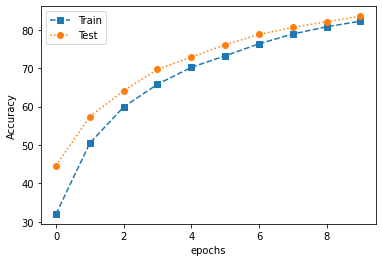

In [162]:
epochs = range(len(Training_accuracy))
plt.plot(epochs, Training_accuracy,'--s',label='Train')
plt.plot(epochs, Testing_accuracy,':o',label='Test')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Saving Models**

In [163]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


**Loading Models**

In [164]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

**Predictions**

This model can now be used to make predictions.

In [166]:
classes = [
    "Zero",
    "One",
    "Two",
    "Three",
    "Four",
    "Five",
    "Six",
    "Seven",
    "Eight",
    "Nine",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Seven", Actual: "Seven"


# Case #2: FashionMNIST DATASET

**Loading Packages - Libraries**

In [60]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import pdb

**Loading Dataset**

In [61]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

**Creating Dataloader**

In [62]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


**Creating Models**

In [138]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**Optimizing the Model Parameters**

Defining the loss function and an optimizer.

In [139]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Training Loop

In [140]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    correct /= size
    return (100*correct), loss

Testing Loop

In [141]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (100*correct), test_loss

Running Training and Testing

In [142]:
epochs = 10
Training_accuracy=[]
Training_loss=[]
Testing_accuracy=[]
Testing_loss=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    TrainAcc, TrainLoss = train(train_dataloader, model, loss_fn, optimizer)
    TestAcc, TestLoss = test(test_dataloader, model, loss_fn)
    Training_accuracy.append(TrainAcc)
    Training_loss.append(TrainLoss)
    Testing_accuracy.append(TestAcc)
    Testing_loss.append(TestLoss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301263  [    0/60000]
loss: 2.288278  [ 6400/60000]
loss: 2.278436  [12800/60000]
loss: 2.276085  [19200/60000]
loss: 2.253812  [25600/60000]
loss: 2.231137  [32000/60000]
loss: 2.236620  [38400/60000]
loss: 2.202527  [44800/60000]
loss: 2.201487  [51200/60000]
loss: 2.175186  [57600/60000]
Test Error: 
 Accuracy: 46.0%, Avg loss: 2.169715 

Epoch 2
-------------------------------
loss: 2.170976  [    0/60000]
loss: 2.164708  [ 6400/60000]
loss: 2.118800  [12800/60000]
loss: 2.136632  [19200/60000]
loss: 2.093225  [25600/60000]
loss: 2.033053  [32000/60000]
loss: 2.056554  [38400/60000]
loss: 1.985295  [44800/60000]
loss: 1.995134  [51200/60000]
loss: 1.920376  [57600/60000]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.927851 

Epoch 3
-------------------------------
loss: 1.949764  [    0/60000]
loss: 1.925978  [ 6400/60000]
loss: 1.825829  [12800/60000]
loss: 1.862493  [19200/60000]
loss: 1.767789  [25600/60000]
loss: 1.706251  [32000/600

**Plotting Accuracy Curves**

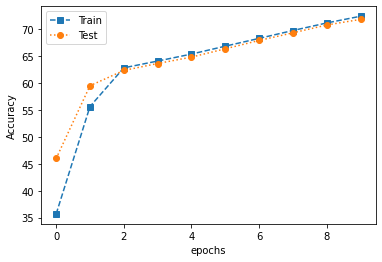

In [144]:
epochs = range(len(Training_accuracy))
plt.plot(epochs, Training_accuracy,'--s',label='Train')
plt.plot(epochs, Testing_accuracy,':o',label='Test')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Saving Models**

In [111]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


**Loading Models**

In [112]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

**Predictions**

This model can now be used to make predictions.

In [113]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
